<a href="https://colab.research.google.com/github/rodrigorissettoterra/ETL-com-Python/blob/main/ETL_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ETL com Python
Repositório: https://github.com/ftiosso/dio-curso-etl/

ETL = Extração (Extract), Transformação (Transform) e Carregamento (Load) de dados

- **Extração:** Coleta de dados de diversas fontes de dados.
- **Transformação:** Propagados para a área de preparação de dados, onde são transformados e limpos.
- **Load:** Carregamento dos dados no data warehouse.




##Iniciando a Etapa de Extração de dados

Para acessar o repositório de dados:
- Acessar: https://www2.fab.mil.br/cenipa/
- Menu lateral, clicar em "Dados abertos".
- Clicar em Tabela de ocorrência
- Clicar em ir para recurso, para fazer o download


Para conhecer o modelo de dados
- Acessar: https://www2.fab.mil.br/cenipa/
- Menu lateral, clicar em "Dados abertos".
- Clicar em Modelo de dados
- Clicar em ir para recurso

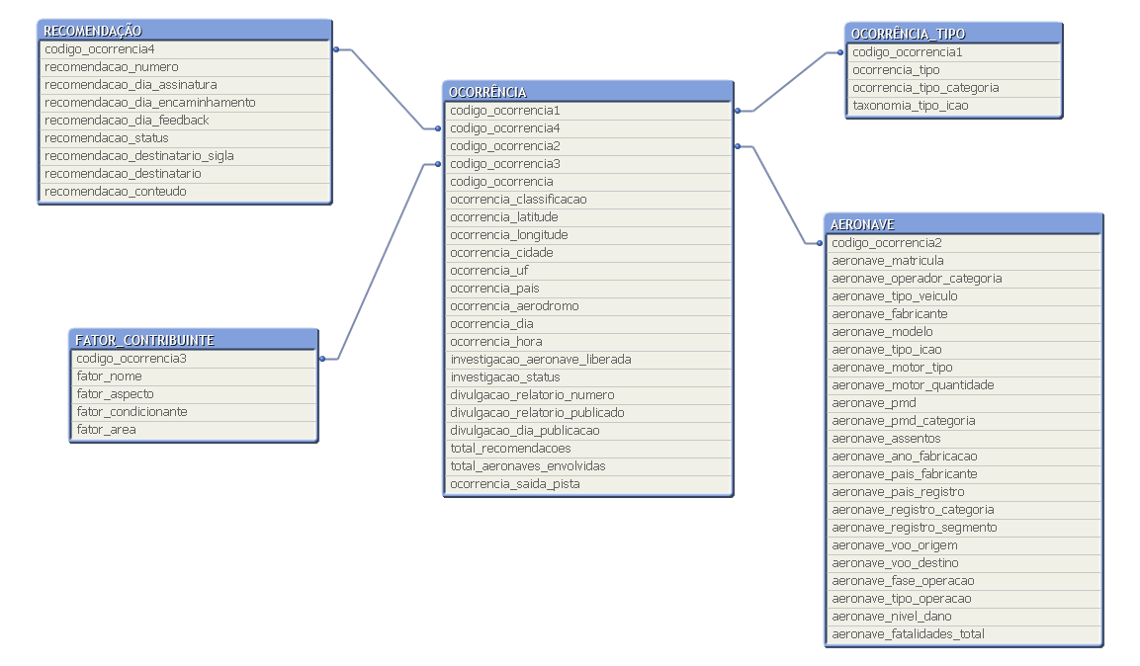

Abrir o arquivo de ocorrência, pelo Excel.

**Excluir** as colunas:
- codigo_ocorrencia1
- codigo_ocorrencia3
- codigo_ocorrencia4
- ocorrencia_latitude
- ocorrencia_longitude
- ocorrencia_pais
- investigacao_aeronave_liberada
- investigacao_status
- divulgacao_relatorio_numero
- divulgacao_relatorio_publicado
- divulgacao_dia_publicacao
- total_aeronaves_envolvidas
- ocorrencia_saida_pista

A Exclusão dessas colunas é somente para facilitar o trabalho com os dados
</br></br>


**Restarão** apenas as colunas: 
- codigo_ocorrencia
- codigo_ocorrencia2
- ocorrencia_classificacao
- ocorrencia_cidade
- ocorrencia_uf
- ocorrencia_aerodromo
- ocorrencia_dia
- ocorrencia_hora
- total_recomendacoes





In [1]:
#Importar a biblioteca Pandas e a chamaremos de "pd"

import pandas as pd

In [2]:
#Vamos abrir o nosso arquivo em csv, para conseguir ler.
#Vamos salvar esse arquivo como um novo dataframe, chamado df.
#Vamos adicionar um parâmetro que separa as informações utilizando ";", como: sep=';'.

df = pd.read_csv('https://raw.githubusercontent.com/ftiosso/dio-curso-etl/main/ocorrencia_2010_2020.csv', sep=';')

#Vamos verificar se o arquivo foi carregado corretamente
df

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,40211,40211,INCIDENTE,RIO DE JANEIRO,RJ,****,03/01/2010,12:00:00,0
1,40349,40349,INCIDENTE,BELÉM,PA,SBBE,03/01/2010,11:05:00,0
2,40351,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,03/01/2010,03:00:00,0
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,****,04/01/2010,17:30:00,0
4,40324,40324,INCIDENTE,PELOTAS,RS,SBPK,05/01/2010,19:25:00,0
...,...,...,...,...,...,...,...,...,...
5747,79804,79804,INCIDENTE,CAMPINAS,SP,SBKP,29/12/2020,19:00:00,0
5748,79757,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,****,30/12/2020,18:30:00,0
5749,79802,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,30/12/2020,00:54:00,0
5750,79756,79756,INCIDENTE GRAVE,VICENTINA,MS,****,31/12/2020,09:00:00,0


In [3]:
#Vamos analisar os tipos de dados que foram carregados

df.dtypes

codigo_ocorrencia            int64
codigo_ocorrencia2           int64
ocorrencia_classificacao    object
ocorrencia_cidade           object
ocorrencia_uf               object
ocorrencia_aerodromo        object
ocorrencia_dia              object
ocorrencia_hora             object
total_recomendacoes          int64
dtype: object

In [4]:
#Note que a coluna ocorrencia_dia é um tipo objeto, porém, precisamos convertê-la para o tipo data
#vamos atualizar o carregamento do dataframe, incluindo um novo parâmetro: parse_dates=['ocorrencia_dia']

df = pd.read_csv('https://raw.githubusercontent.com/ftiosso/dio-curso-etl/main/ocorrencia_2010_2020.csv', sep=';', parse_dates=['ocorrencia_dia'])
df.dtypes

codigo_ocorrencia                    int64
codigo_ocorrencia2                   int64
ocorrencia_classificacao            object
ocorrencia_cidade                   object
ocorrencia_uf                       object
ocorrencia_aerodromo                object
ocorrencia_dia              datetime64[ns]
ocorrencia_hora                     object
total_recomendacoes                  int64
dtype: object

##Fim da etapa de Extração de dados.

---

##Iniciando a Etapa de Validação de dados

In [5]:
#Vamos iniciar imprimindo somente as 10 primeiras linhas do nosso dataframe

df.head(10)

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,40211,40211,INCIDENTE,RIO DE JANEIRO,RJ,****,2010-03-01,12:00:00,0
1,40349,40349,INCIDENTE,BELÉM,PA,SBBE,2010-03-01,11:05:00,0
2,40351,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-03-01,03:00:00,0
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,****,2010-04-01,17:30:00,0
4,40324,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-05-01,19:25:00,0
5,39807,39807,INCIDENTE,SALVADOR,BA,****,2010-06-01,17:53:00,0
6,40215,40215,INCIDENTE,COARI,AM,SBUY,2010-07-01,18:40:00,0
7,39707,39707,INCIDENTE GRAVE,CANUTAMA,AM,****,2010-09-01,12:30:00,3
8,39156,39156,INCIDENTE GRAVE,CASCAVEL,PR,SBCA,2010-10-01,23:15:00,2
9,39711,39711,INCIDENTE GRAVE,PARÁ DE MINAS,MG,****,2010-10-01,20:00:00,0


Vamos ajustar a coluna "ocorrencia_dia", para exibir a data no formato correto
Apesar desse dado estar correto, no arquivo original em csv, 
aqui a data aparece como ANO - MÊS - DIA

In [6]:
#Para converter a data para o formato correto, vamos incluir um novo parâmetro ao carregar o nosso arquivo csv
#dayfirst=True
df = pd.read_csv('https://raw.githubusercontent.com/ftiosso/dio-curso-etl/main/ocorrencia_2010_2020.csv', sep=';', parse_dates=['ocorrencia_dia'], dayfirst=True)
df

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,40211,40211,INCIDENTE,RIO DE JANEIRO,RJ,****,2010-01-03,12:00:00,0
1,40349,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0
2,40351,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,****,2010-01-04,17:30:00,0
4,40324,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0
...,...,...,...,...,...,...,...,...,...
5747,79804,79804,INCIDENTE,CAMPINAS,SP,SBKP,2020-12-29,19:00:00,0
5748,79757,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,****,2020-12-30,18:30:00,0
5749,79802,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,2020-12-30,00:54:00,0
5750,79756,79756,INCIDENTE GRAVE,VICENTINA,MS,****,2020-12-31,09:00:00,0


In [7]:
#Para verificar os 10 últimos registros, podemos utilizar a função df.tail(10)
df.tail()

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
5747,79804,79804,INCIDENTE,CAMPINAS,SP,SBKP,2020-12-29,19:00:00,0
5748,79757,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,****,2020-12-30,18:30:00,0
5749,79802,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,2020-12-30,00:54:00,0
5750,79756,79756,INCIDENTE GRAVE,VICENTINA,MS,****,2020-12-31,09:00:00,0
5751,79844,79844,INCIDENTE,RIO DE JANEIRO,RJ,SBJR,2020-12-31,13:24:00,0


Caso você se depare com alguma data vazia, veremos no lugar um "NaN".

Trataremos desses dados, mais pra frente, na etapa de limpeza de dados.

In [8]:
df.dtypes

codigo_ocorrencia                    int64
codigo_ocorrencia2                   int64
ocorrencia_classificacao            object
ocorrencia_cidade                   object
ocorrencia_uf                       object
ocorrencia_aerodromo                object
ocorrencia_dia              datetime64[ns]
ocorrencia_hora                     object
total_recomendacoes                  int64
dtype: object

Mesmo executando o carregamento do Dataframe, utilizando "parse_dates=['ocorrencia_dia']", é possível que tenhamos um problema, SE tivermos alguma data errada, por exemplo 04/50/2022. 

Não existe mês 50, dessa forma, o tipo da coluna "ocorrencia_dia" será considerado como um objeto. Por esse motivo, é sempre prudente verificar os tipos de datas que estão sendo utilizadas.

Para evitar esse tipo de erro, utilizaremos uma biblioteca chamada Pandera.

In [9]:
!pip install pandera
import pandera as pan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
#Vamos montar um esquema para definir os tipos de dados das colunas do nosso dataframe

schema = pan.DataFrameSchema(
    columns = {
        "codigo_ocorrencia":pan.Column(pan.Int)
    }
)

In [11]:
schema.validate(df)

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,40211,40211,INCIDENTE,RIO DE JANEIRO,RJ,****,2010-01-03,12:00:00,0
1,40349,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0
2,40351,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,****,2010-01-04,17:30:00,0
4,40324,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0
...,...,...,...,...,...,...,...,...,...
5747,79804,79804,INCIDENTE,CAMPINAS,SP,SBKP,2020-12-29,19:00:00,0
5748,79757,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,****,2020-12-30,18:30:00,0
5749,79802,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,2020-12-30,00:54:00,0
5750,79756,79756,INCIDENTE GRAVE,VICENTINA,MS,****,2020-12-31,09:00:00,0


Dado que o "schema.validate(df)" resultou na apresentação do nosso dataframe, podemos assumir que foi validade e garantimos que toda a coluna "codigo_ocorrencia" possui somente inteiros.

In [12]:
#Vamos fazer essa mesma validação para todas as colunas do nosso Dataframe
schema = pan.DataFrameSchema(
    columns = {
        "codigo_ocorrencia":pan.Column(pan.Int),
        "codigo_ocorrencia2":pan.Column(pan.Int),
        "ocorrencia_classificacao":pan.Column(pan.String),
        "ocorrencia_cidade":pan.Column(pan.String),
        "ocorrencia_uf":pan.Column(pan.String),
        "ocorrencia_aerodromo":pan.Column(pan.String),
        "ocorrencia_dia":pan.Column(pan.DateTime),
        "ocorrencia_hora":pan.Column(pan.String),
        "total_recomendacoes":pan.Column(pan.Int)
    }
)

#schema.validate(df)

Caso apareça algo "NaN", basta excluir a linha no arquivo original, recarregar o arquivo no Drive e refazer a validação.

**ALTERNATIVA:** "ocorrencia_hora":pan.Column(pan.String, nullable=True),
Desse modo, você permite que a coluna tenha valores nulos, sem quebrar a validação.

In [13]:
#Vamos validar agora o formato da hora
schema = pan.DataFrameSchema(
    columns = {
        "ocorrencia_hora":pan.Column(pan.String, 
                                     pan.Check.str_matches(r'^([0-1]?[0-9]|[2][0-3]):([0-5][0-9])(:[0-5][0-9])?$'), 
                                     nullable=True)
        }
)

#schema.validate(df)

Vamos fazer uma validação agora, para limitarmos a quantidade de caracteres de uma coluna, 
neste caso, "ocorrencia_uf". Vamos limitar para apenas 2 caracteres.

In [14]:
#Vamos validar agora o formato abreviado do estado de ocorrência
schema = pan.DataFrameSchema(
    columns = {
        "ocorrencia_uf":pan.Column(pan.String, pan.Check.str_length(2,2))
        }
)

#schema.validate(df)

Nesse caso, vamos voltar para o arquivo CSV e ver se conseguimos descobrir o estado destas 
ocorrências. 
Ao encontrá-las, vou excluir somente os "***". 
Não se esqueça que, como ficarão vazios, precisamos incluir "nullable=True", como parâmetro.

In [15]:
#Vamos validar agora o formato abreviado do estado de ocorrência
schema = pan.DataFrameSchema(
    columns = {
        "ocorrencia_uf":pan.Column(pan.String, pan.Check.str_length(2,2), nullable=True)
        }
)

schema.validate(df)

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,40211,40211,INCIDENTE,RIO DE JANEIRO,RJ,****,2010-01-03,12:00:00,0
1,40349,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0
2,40351,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,****,2010-01-04,17:30:00,0
4,40324,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0
...,...,...,...,...,...,...,...,...,...
5747,79804,79804,INCIDENTE,CAMPINAS,SP,SBKP,2020-12-29,19:00:00,0
5748,79757,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,****,2020-12-30,18:30:00,0
5749,79802,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,2020-12-30,00:54:00,0
5750,79756,79756,INCIDENTE GRAVE,VICENTINA,MS,****,2020-12-31,09:00:00,0


##Fim da etapa de Validação de dados.

---

##Iniciando a Etapa de Limpeza dos dados

Mesmo após a Etapa de Validação de dados, ainda existem alguns ajustes que podem ser feitos.

Por exemplo, na coluna "ocorrencia_aerodromo" ainda existem dados com "****". Essa notação existe para indicar que o aeródromo não foi informado, mas podemos substituir o formato por outro mais conveniente ao nosso trabalho.

In [16]:
#Vamos começar analisando um conteúdo específico de uma linha e uma coluna
#Linha 1, da coluna 'ocorrencia_cidade'

df.loc[1,'ocorrencia_cidade']

'BELÉM'

In [17]:
#Caso queira avaliar os dados de uma linha inteira, basta utilizar somente o primeiro parâmetro

df.loc[3]

codigo_ocorrencia                         39527
codigo_ocorrencia2                        39527
ocorrencia_classificacao               ACIDENTE
ocorrencia_cidade            LUCAS DO RIO VERDE
ocorrencia_uf                                MT
ocorrencia_aerodromo                       ****
ocorrencia_dia              2010-01-04 00:00:00
ocorrencia_hora                        17:30:00
total_recomendacoes                           0
Name: 3, dtype: object

In [18]:
#Caso queira avaliar os caonteúdos de mais linhas, basta utilizar

df.loc[1:3]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
1,40349,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0
2,40351,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,****,2010-01-04,17:30:00,0


In [19]:
#Caso queira avaliar linhas distantes, basta utilizar

df.loc[[10,40]]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
10,39789,39789,INCIDENTE,SÃO PEDRO DO SUL,RS,****,2010-01-10,21:30:00,0
40,39158,39158,INCIDENTE,BELÉM,PA,****,2010-01-28,16:00:00,0


In [20]:
#Caso queira avaliar somente uma coluna específica

df.loc[:,'ocorrencia_classificacao']

0             INCIDENTE
1             INCIDENTE
2             INCIDENTE
3              ACIDENTE
4             INCIDENTE
             ...       
5747          INCIDENTE
5748    INCIDENTE GRAVE
5749          INCIDENTE
5750    INCIDENTE GRAVE
5751          INCIDENTE
Name: ocorrencia_classificacao, Length: 5752, dtype: object

In [21]:
#Verificando se os valores de uma coluna são únicos

df.codigo_ocorrencia.is_unique

True

In [22]:
#Definindo uma coluna com valores únicos, como índice de identificação

df.set_index('codigo_ocorrencia', inplace=True)

In [23]:
df.head()

,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
codigo_ocorrencia,,,,,,,,
40211,40211,INCIDENTE,RIO DE JANEIRO,RJ,****,2010-01-03,12:00:00,0
40349,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0
40351,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0
39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,****,2010-01-04,17:30:00,0
40324,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0


In [24]:
#Verificando a última linha

df.loc[79844]

codigo_ocorrencia2                        79844
ocorrencia_classificacao              INCIDENTE
ocorrencia_cidade                RIO DE JANEIRO
ocorrencia_uf                                RJ
ocorrencia_aerodromo                       SBJR
ocorrencia_dia              2020-12-31 00:00:00
ocorrencia_hora                        13:24:00
total_recomendacoes                           0
Name: 79844, dtype: object

In [25]:
#Retomando o índice original

df.reset_index(drop=True, inplace=True)
df.head()

,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,40211,INCIDENTE,RIO DE JANEIRO,RJ,****,2010-01-03,12:00:00,0
1,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0
2,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0
3,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,****,2010-01-04,17:30:00,0
4,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0


Vamos iniciar a alteração de dados em nossas colunas

In [26]:
#Primeiro, criaremos uma coluna de Backup, para evitar qualquer problema

df['ocorrencia_uf_backup'] = df.ocorrencia_uf
df

,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes,ocorrencia_uf_backup
0,40211,INCIDENTE,RIO DE JANEIRO,RJ,****,2010-01-03,12:00:00,0,RJ
1,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0,PA
2,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0,RJ
3,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,****,2010-01-04,17:30:00,0,MT
4,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0,RS
...,...,...,...,...,...,...,...,...,...
5747,79804,INCIDENTE,CAMPINAS,SP,SBKP,2020-12-29,19:00:00,0,SP
5748,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,****,2020-12-30,18:30:00,0,TO
5749,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,2020-12-30,00:54:00,0,RJ
5750,79756,INCIDENTE GRAVE,VICENTINA,MS,****,2020-12-31,09:00:00,0,MS


In [27]:
#Criando uma coluna de backup para uma alteração futura

df['ocorrencia_classificacao_backup'] = df.ocorrencia_classificacao
df

,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes,ocorrencia_uf_backup,ocorrencia_classificacao_backup
0,40211,INCIDENTE,RIO DE JANEIRO,RJ,****,2010-01-03,12:00:00,0,RJ,INCIDENTE
1,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0,PA,INCIDENTE
2,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0,RJ,INCIDENTE
3,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,****,2010-01-04,17:30:00,0,MT,ACIDENTE
4,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0,RS,INCIDENTE
...,...,...,...,...,...,...,...,...,...,...
5747,79804,INCIDENTE,CAMPINAS,SP,SBKP,2020-12-29,19:00:00,0,SP,INCIDENTE
5748,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,****,2020-12-30,18:30:00,0,TO,INCIDENTE GRAVE
5749,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,2020-12-30,00:54:00,0,RJ,INCIDENTE
5750,79756,INCIDENTE GRAVE,VICENTINA,MS,****,2020-12-31,09:00:00,0,MS,INCIDENTE GRAVE


In [28]:
#Alterando um conteúdo de uma coluna, baseado em um filtro (de outra coluna)
df.loc[df.ocorrencia_uf == 'SP', ['ocorrencia_classificacao']] = 'GRAVE'
df

,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes,ocorrencia_uf_backup,ocorrencia_classificacao_backup
0,40211,INCIDENTE,RIO DE JANEIRO,RJ,****,2010-01-03,12:00:00,0,RJ,INCIDENTE
1,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0,PA,INCIDENTE
2,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0,RJ,INCIDENTE
3,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,****,2010-01-04,17:30:00,0,MT,ACIDENTE
4,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0,RS,INCIDENTE
...,...,...,...,...,...,...,...,...,...,...
5747,79804,GRAVE,CAMPINAS,SP,SBKP,2020-12-29,19:00:00,0,SP,INCIDENTE
5748,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,****,2020-12-30,18:30:00,0,TO,INCIDENTE GRAVE
5749,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,2020-12-30,00:54:00,0,RJ,INCIDENTE
5750,79756,INCIDENTE GRAVE,VICENTINA,MS,****,2020-12-31,09:00:00,0,MS,INCIDENTE GRAVE


In [29]:
#Como fizemos muitas alterações, vou retomar o arquivo CSV original

df = pd.read_csv('https://raw.githubusercontent.com/ftiosso/dio-curso-etl/main/ocorrencia_2010_2020.csv', sep=';', parse_dates=['ocorrencia_dia'], dayfirst=True)
df

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,40211,40211,INCIDENTE,RIO DE JANEIRO,RJ,****,2010-01-03,12:00:00,0
1,40349,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0
2,40351,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,****,2010-01-04,17:30:00,0
4,40324,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0
...,...,...,...,...,...,...,...,...,...
5747,79804,79804,INCIDENTE,CAMPINAS,SP,SBKP,2020-12-29,19:00:00,0
5748,79757,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,****,2020-12-30,18:30:00,0
5749,79802,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,2020-12-30,00:54:00,0
5750,79756,79756,INCIDENTE GRAVE,VICENTINA,MS,****,2020-12-31,09:00:00,0


O que iremos alterar: 

- Coluna "ocorrencia_uf", "**"
- Coluna "ocorrencia_aerodromo", "###!", "####", "* * * *", "* * * * *"
- Coluna ocorrencia_hora, "NULL"

In [30]:
df.loc[df.ocorrencia_aerodromo == '****', ['ocorrencia_aerodromo']] = pd.NA

In [31]:
df

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,40211,40211,INCIDENTE,RIO DE JANEIRO,RJ,<NA>,2010-01-03,12:00:00,0
1,40349,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0
2,40351,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,<NA>,2010-01-04,17:30:00,0
4,40324,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0
...,...,...,...,...,...,...,...,...,...
5747,79804,79804,INCIDENTE,CAMPINAS,SP,SBKP,2020-12-29,19:00:00,0
5748,79757,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,<NA>,2020-12-30,18:30:00,0
5749,79802,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,2020-12-30,00:54:00,0
5750,79756,79756,INCIDENTE GRAVE,VICENTINA,MS,<NA>,2020-12-31,09:00:00,0


In [32]:
#Fazendo mais alterações por vez, ao invéz de uma por uma

df.replace(['**','###!','####','****','*****','NULL'], pd.NA, inplace=True)

In [33]:
#Contando a quantidade de dados "NA" com sum()

df.isna().sum()

codigo_ocorrencia              0
codigo_ocorrencia2             0
ocorrencia_classificacao       0
ocorrencia_cidade              0
ocorrencia_uf                  1
ocorrencia_aerodromo        2349
ocorrencia_dia                 0
ocorrencia_hora                1
total_recomendacoes            0
dtype: int64

In [34]:
#ALTERNATIVA

df.isnull().sum()

codigo_ocorrencia              0
codigo_ocorrencia2             0
ocorrencia_classificacao       0
ocorrencia_cidade              0
ocorrencia_uf                  1
ocorrencia_aerodromo        2349
ocorrencia_dia                 0
ocorrencia_hora                1
total_recomendacoes            0
dtype: int64

In [35]:
#Vamos excluir uma coluna, mas antes, criarei uma coluna de backup, para depois excluí-la.

df['total_recomendacoes_backup'] = df.total_recomendacoes
df

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes,total_recomendacoes_backup
0,40211,40211,INCIDENTE,RIO DE JANEIRO,RJ,<NA>,2010-01-03,12:00:00,0,0
1,40349,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0,0
2,40351,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0,0
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,<NA>,2010-01-04,17:30:00,0,0
4,40324,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0,0
...,...,...,...,...,...,...,...,...,...,...
5747,79804,79804,INCIDENTE,CAMPINAS,SP,SBKP,2020-12-29,19:00:00,0,0
5748,79757,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,<NA>,2020-12-30,18:30:00,0,0
5749,79802,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,2020-12-30,00:54:00,0,0
5750,79756,79756,INCIDENTE GRAVE,VICENTINA,MS,<NA>,2020-12-31,09:00:00,0,0


In [36]:
#Excluindo a coluna 'total_recomendacoes_backup'

df.drop(['total_recomendacoes_backup'], axis=1, inplace=True)
df

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,40211,40211,INCIDENTE,RIO DE JANEIRO,RJ,<NA>,2010-01-03,12:00:00,0
1,40349,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0
2,40351,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,<NA>,2010-01-04,17:30:00,0
4,40324,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0
...,...,...,...,...,...,...,...,...,...
5747,79804,79804,INCIDENTE,CAMPINAS,SP,SBKP,2020-12-29,19:00:00,0
5748,79757,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,<NA>,2020-12-30,18:30:00,0
5749,79802,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,2020-12-30,00:54:00,0
5750,79756,79756,INCIDENTE GRAVE,VICENTINA,MS,<NA>,2020-12-31,09:00:00,0


In [37]:
#Caso queremos excluir valores duplicados, basta utilizar

df.drop_duplicates()

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,40211,40211,INCIDENTE,RIO DE JANEIRO,RJ,<NA>,2010-01-03,12:00:00,0
1,40349,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0
2,40351,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,<NA>,2010-01-04,17:30:00,0
4,40324,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0
...,...,...,...,...,...,...,...,...,...
5747,79804,79804,INCIDENTE,CAMPINAS,SP,SBKP,2020-12-29,19:00:00,0
5748,79757,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,<NA>,2020-12-30,18:30:00,0
5749,79802,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,2020-12-30,00:54:00,0
5750,79756,79756,INCIDENTE GRAVE,VICENTINA,MS,<NA>,2020-12-31,09:00:00,0


##Fim da etapa de Limpeza de dados.

---

##Iniciando a Etapa de Transformação de dados

In [38]:
#Vamos agora, definir uma maneira um pouco mais rápida para a substituição de valores

valores_ausentes = ['**','###!','####','****','*****','NULL']
df = pd.read_csv('https://raw.githubusercontent.com/ftiosso/dio-curso-etl/main/ocorrencia_2010_2020.csv', sep = ';', parse_dates = ['ocorrencia_dia'], dayfirst = True, na_values = valores_ausentes)
df.head(10)

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,40211,40211,INCIDENTE,RIO DE JANEIRO,RJ,NaN,2010-01-03,12:00:00,0
1,40349,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0
2,40351,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,NaN,2010-01-04,17:30:00,0
4,40324,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0
5,39807,39807,INCIDENTE,SALVADOR,BA,NaN,2010-01-06,17:53:00,0
6,40215,40215,INCIDENTE,COARI,AM,SBUY,2010-01-07,18:40:00,0
7,39707,39707,INCIDENTE GRAVE,CANUTAMA,AM,NaN,2010-01-09,12:30:00,3
8,39156,39156,INCIDENTE GRAVE,CASCAVEL,PR,SBCA,2010-01-10,23:15:00,2
9,39711,39711,INCIDENTE GRAVE,PARÁ DE MINAS,MG,NaN,2010-01-10,20:00:00,0


Caso encontre algum valor "NULL", alterar o "schema", incluindo nos parâmetros da coluna o "nullable = True".

In [39]:
# Para trabalhar com os dados, da mesma forma que em uma lista, basta utilizar
df.iloc[10]
#Dessa forma, você está pegando o registro de índice 10

codigo_ocorrencia                         39789
codigo_ocorrencia2                        39789
ocorrencia_classificacao              INCIDENTE
ocorrencia_cidade              SÃO PEDRO DO SUL
ocorrencia_uf                                RS
ocorrencia_aerodromo                        NaN
ocorrencia_dia              2010-01-10 00:00:00
ocorrencia_hora                        21:30:00
total_recomendacoes                           0
Name: 10, dtype: object

In [40]:
#Relembrando a contagem de NA
df.isna().sum()

codigo_ocorrencia              0
codigo_ocorrencia2             0
ocorrencia_classificacao       0
ocorrencia_cidade              0
ocorrencia_uf                  1
ocorrencia_aerodromo        2349
ocorrencia_dia                 0
ocorrencia_hora                1
total_recomendacoes            0
dtype: int64

In [41]:
#Relembrando a contagem de NULL
df.isnull().sum()

codigo_ocorrencia              0
codigo_ocorrencia2             0
ocorrencia_classificacao       0
ocorrencia_cidade              0
ocorrencia_uf                  1
ocorrencia_aerodromo        2349
ocorrencia_dia                 0
ocorrencia_hora                1
total_recomendacoes            0
dtype: int64

In [42]:
#Criando um filtro para ver qual UF tem valores nulos

filtro = df.ocorrencia_uf.isnull()
df.loc[filtro]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
2227,49474,49474,ACIDENTE,ÁGUAS INTERNACIONAIS,NaN,NaN,2013-09-02,02:54:00,0


In [43]:
#Vamos criar um filtro, para ocorrências com mais de 10 recomendações
filtro2 = df.total_recomendacoes > 10
df.loc[filtro2]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
63,39992,39992,ACIDENTE,SÃO PAULO,SP,SBMT,2010-02-17,20:07:00,11
326,42250,42250,ACIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-08-12,12:26:00,19
530,43471,43471,ACIDENTE,SÃO PAULO,SP,NaN,2010-12-14,20:15:00,11
727,44377,44377,ACIDENTE,ITÁPOLIS,SP,SDIO,2011-04-09,14:50:00,11
872,44796,44796,ACIDENTE,RECIFE,PE,SBRF,2011-07-13,09:54:00,23
884,44888,44888,INCIDENTE GRAVE,SÃO JOSÉ DOS PINHAIS,PR,SBCT,2011-07-15,17:05:00,11
1062,45554,45554,INCIDENTE GRAVE,UBERLÂNDIA,MG,SBUL,2011-11-15,02:15:00,20
1972,47938,47938,INCIDENTE,BRASÍLIA,DF,SBBR,2013-04-13,18:00:00,11
2795,52265,52265,ACIDENTE,SANTOS,SP,NaN,2014-08-13,13:03:00,13
3930,66432,66432,INCIDENTE GRAVE,VITÓRIA,ES,NaN,2017-02-21,11:47:00,12


In [44]:
#Vamos criar um filtro, para ocorrências com mais de 10 recomendações,
# trazendo algumas colunas específicas

filtro3 = df.total_recomendacoes > 10
df.loc[filtro3, ['ocorrencia_cidade','total_recomendacoes','ocorrencia_classificacao']]

,ocorrencia_cidade,total_recomendacoes,ocorrencia_classificacao
63,SÃO PAULO,11,ACIDENTE
326,RIO DE JANEIRO,19,ACIDENTE
530,SÃO PAULO,11,ACIDENTE
727,ITÁPOLIS,11,ACIDENTE
872,RECIFE,23,ACIDENTE
884,SÃO JOSÉ DOS PINHAIS,11,INCIDENTE GRAVE
1062,UBERLÂNDIA,20,INCIDENTE GRAVE
1972,BRASÍLIA,11,INCIDENTE
2795,SANTOS,13,ACIDENTE
3930,VITÓRIA,12,INCIDENTE GRAVE


In [45]:
#Vamos criar um filtro que retorne as ocorrências "incidente grave".

filtro4 = df.ocorrencia_classificacao == 'INCIDENTE GRAVE'
df.loc[filtro4, ['ocorrencia_cidade','ocorrencia_classificacao','total_recomendacoes']]

,ocorrencia_cidade,ocorrencia_classificacao,total_recomendacoes
7,CANUTAMA,INCIDENTE GRAVE,3
8,CASCAVEL,INCIDENTE GRAVE,2
9,PARÁ DE MINAS,INCIDENTE GRAVE,0
29,CURITIBA,INCIDENTE GRAVE,2
35,PALMAS,INCIDENTE GRAVE,0
...,...,...,...
5741,NOVA MARINGÁ,INCIDENTE GRAVE,0
5744,GOIATUBA,INCIDENTE GRAVE,0
5746,MANOEL URBANO,INCIDENTE GRAVE,0
5748,LAGOA DA CONFUSÃO,INCIDENTE GRAVE,0


In [46]:
#Vamos combinar dois filtros
#Filtro5 == INCIDENTE GRAVE e Filtro6 == SP

filtro5 = df.ocorrencia_classificacao == 'INCIDENTE GRAVE'
filtro6 = df.ocorrencia_uf == 'SP'
df.loc[filtro5 & filtro6]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
136,40270,40270,INCIDENTE GRAVE,PIRASSUNUNGA,SP,SDPY,2010-04-15,20:15:00,0
171,40620,40620,INCIDENTE GRAVE,GUARULHOS,SP,SBGR,2010-05-06,15:50:00,0
219,41411,41411,INCIDENTE GRAVE,SÃO PAULO,SP,SBMT,2010-06-08,19:30:00,2
297,42289,42289,INCIDENTE GRAVE,SÃO PAULO,SP,SBMT,2010-07-29,20:06:00,0
314,42323,42323,INCIDENTE GRAVE,SÃO JOSÉ DO RIO PRETO,SP,SBSR,2010-08-05,12:01:00,0
...,...,...,...,...,...,...,...,...,...
5591,79540,79540,INCIDENTE GRAVE,SÃO PAULO,SP,NaN,2020-09-12,13:10:00,0
5610,79566,79566,INCIDENTE GRAVE,REGENTE FEIJÓ,SP,SDYJ,2020-09-27,19:33:00,0
5704,79739,79739,INCIDENTE GRAVE,SÃO PAULO,SP,SBSP,2020-12-03,14:42:00,0
5705,79705,79705,INCIDENTE GRAVE,SOROCABA,SP,SDCO,2020-12-04,15:30:00,0


In [47]:
#Vamos combinar dois filtros
#Filtro7 == INCIDENTE GRAVE ou INCIDENTE e Filtro8 == SP

filtro7 = (df.ocorrencia_classificacao == 'INCIDENTE GRAVE') | (df.ocorrencia_classificacao == 'INCIDENTE')
filtro8 = df.ocorrencia_uf == 'SP'
df.loc[filtro7 & filtro8]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
16,39809,39809,INCIDENTE,SÃO PAULO,SP,NaN,2010-01-15,15:00:00,0
18,39828,39828,INCIDENTE,SANTOS,SP,NaN,2010-01-15,17:45:00,0
26,39847,39847,INCIDENTE,SOROCABA,SP,NaN,2010-01-20,13:10:00,0
27,39768,39768,INCIDENTE,CAMPINAS,SP,NaN,2010-01-21,20:45:00,0
33,39848,39848,INCIDENTE,GUARULHOS,SP,SBGR,2010-01-25,17:05:00,0
...,...,...,...,...,...,...,...,...,...
5704,79739,79739,INCIDENTE GRAVE,SÃO PAULO,SP,SBSP,2020-12-03,14:42:00,0
5705,79705,79705,INCIDENTE GRAVE,SOROCABA,SP,SDCO,2020-12-04,15:30:00,0
5715,79718,79718,INCIDENTE GRAVE,SÃO PAULO,SP,SBMT,2020-12-11,13:50:00,0
5742,79800,79800,INCIDENTE,SÃO PAULO,SP,SBMT,2020-12-28,10:15:00,0


In [48]:
#Vamos combinar dois filtros
#Filtro7 == INCIDENTE GRAVE ou INCIDENTE e Filtro8 == SP
#Utilizando a função isin

filtro9 = df.ocorrencia_classificacao.isin (['INCIDENTE GRAVE','INCIDENTE'])
filtro10 = df.ocorrencia_uf == 'SP'
df.loc[filtro9 & filtro10]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
16,39809,39809,INCIDENTE,SÃO PAULO,SP,NaN,2010-01-15,15:00:00,0
18,39828,39828,INCIDENTE,SANTOS,SP,NaN,2010-01-15,17:45:00,0
26,39847,39847,INCIDENTE,SOROCABA,SP,NaN,2010-01-20,13:10:00,0
27,39768,39768,INCIDENTE,CAMPINAS,SP,NaN,2010-01-21,20:45:00,0
33,39848,39848,INCIDENTE,GUARULHOS,SP,SBGR,2010-01-25,17:05:00,0
...,...,...,...,...,...,...,...,...,...
5704,79739,79739,INCIDENTE GRAVE,SÃO PAULO,SP,SBSP,2020-12-03,14:42:00,0
5705,79705,79705,INCIDENTE GRAVE,SOROCABA,SP,SDCO,2020-12-04,15:30:00,0
5715,79718,79718,INCIDENTE GRAVE,SÃO PAULO,SP,SBMT,2020-12-11,13:50:00,0
5742,79800,79800,INCIDENTE,SÃO PAULO,SP,SBMT,2020-12-28,10:15:00,0


In [49]:
#Filtrar ocorrencias que as cidades iniciam com a letra 'C'

filtrocidade = df.ocorrencia_cidade.str[0] == 'C'
df.loc[filtrocidade]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
6,40215,40215,INCIDENTE,COARI,AM,SBUY,2010-01-07,18:40:00,0
7,39707,39707,INCIDENTE GRAVE,CANUTAMA,AM,NaN,2010-01-09,12:30:00,3
8,39156,39156,INCIDENTE GRAVE,CASCAVEL,PR,SBCA,2010-01-10,23:15:00,2
15,39315,39315,ACIDENTE,CANUTAMA,AM,NaN,2010-01-15,21:22:00,0
20,40310,40310,INCIDENTE,CRUZEIRO DO SUL,AC,SBCZ,2010-01-18,19:32:00,0
...,...,...,...,...,...,...,...,...,...
5661,79649,79649,INCIDENTE,CAMPINAS,SP,SBKP,2020-11-04,22:39:00,0
5663,79652,79652,INCIDENTE,CONFINS,MG,SBCF,2020-11-06,14:20:00,0
5680,79683,79683,INCIDENTE,CRUZEIRO DO SUL,AC,SBCZ,2020-11-16,22:00:00,0
5696,79692,79692,ACIDENTE,CATANDUVA,SP,SDCD,2020-11-28,12:50:00,0


In [50]:
#Filtrar ocorrencias que as cidades terminam com a letra 'A'

filtrocidade1 = df.ocorrencia_cidade.str[-1] == 'A'
df.loc[filtrocidade1]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
7,39707,39707,INCIDENTE GRAVE,CANUTAMA,AM,NaN,2010-01-09,12:30:00,3
12,40414,40414,INCIDENTE,BRASÍLIA,DF,SBBR,2010-01-10,03:00:00,0
15,39315,39315,ACIDENTE,CANUTAMA,AM,NaN,2010-01-15,21:22:00,0
25,39772,39772,INCIDENTE,UBERLÂNDIA,MG,NaN,2010-01-20,18:58:00,0
26,39847,39847,INCIDENTE,SOROCABA,SP,NaN,2010-01-20,13:10:00,0
...,...,...,...,...,...,...,...,...,...
5738,79787,79787,INCIDENTE,FORTALEZA,CE,SBFZ,2020-12-23,18:30:00,0
5739,79749,79749,ACIDENTE,MARITUBA,PA,NaN,2020-12-26,12:05:00,0
5743,79824,79824,ACIDENTE,RIO PARANAÍBA,MG,SNRP,2020-12-28,17:00:00,0
5744,79753,79753,INCIDENTE GRAVE,GOIATUBA,GO,NaN,2020-12-29,12:00:00,0


In [51]:
#Filtrar ocorrencias que as cidades terminam com 'MA'

filtrocidade3 = df.ocorrencia_cidade.str[-2:] == 'MA'
df.loc[filtrocidade3]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
7,39707,39707,INCIDENTE GRAVE,CANUTAMA,AM,NaN,2010-01-09,12:30:00,3
15,39315,39315,ACIDENTE,CANUTAMA,AM,NaN,2010-01-15,21:22:00,0
408,43062,43062,ACIDENTE,NOVO GAMA,GO,NaN,2010-09-25,16:30:00,1
688,44198,44198,ACIDENTE,BURITAMA,SP,NaN,2011-03-19,11:18:00,0
1035,51785,51785,INCIDENTE,BURITAMA,SP,SIBX,2011-10-25,19:15:00,0
1377,45939,45939,ACIDENTE,UMUARAMA,PR,NaN,2012-05-30,19:00:00,0
1401,46180,46180,ACIDENTE,AURIFLAMA,SP,NaN,2012-06-16,19:30:00,0
2099,49113,49113,INCIDENTE GRAVE,NOVA LIMA,MG,NaN,2013-06-15,12:00:00,4
2102,48799,48799,ACIDENTE,CANUTAMA,AM,NaN,2013-06-18,21:30:00,0
2655,51347,51347,INCIDENTE,DIADEMA,SP,NaN,2014-05-04,16:00:00,0


In [52]:
#Filtrar ocorrencias que as cidades possuem 'MA' em seu nome

filtrocidade4 = df.ocorrencia_cidade.str.contains('MA')
df.loc[filtrocidade4]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
7,39707,39707,INCIDENTE GRAVE,CANUTAMA,AM,NaN,2010-01-09,12:30:00,3
13,39507,39507,ACIDENTE,PRIMAVERA DO LESTE,MT,NaN,2010-01-11,17:00:00,2
15,39315,39315,ACIDENTE,CANUTAMA,AM,NaN,2010-01-15,21:22:00,0
35,39487,39487,INCIDENTE GRAVE,PALMAS,TO,SBPJ,2010-01-26,16:50:00,0
78,39916,39916,INCIDENTE GRAVE,MANAUS,AM,SBEG,2010-03-07,19:35:00,2
...,...,...,...,...,...,...,...,...,...
5732,79745,79745,INCIDENTE,MARABÁ,PA,SBMA,2020-12-21,08:47:00,0
5739,79749,79749,ACIDENTE,MARITUBA,PA,NaN,2020-12-26,12:05:00,0
5741,79754,79754,INCIDENTE GRAVE,NOVA MARINGÁ,MT,NaN,2020-12-28,13:00:00,0
5745,79755,79755,ACIDENTE,MATO RICO,PR,NaN,2020-12-29,10:30:00,0


In [53]:
#Filtrar ocorrencias que as cidades possuem 'MA' ou 'AL' em seu nome

filtrocidade5 = df.ocorrencia_cidade.str.contains('MA|AL')
df.loc[filtrocidade5]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
5,39807,39807,INCIDENTE,SALVADOR,BA,NaN,2010-01-06,17:53:00,0
7,39707,39707,INCIDENTE GRAVE,CANUTAMA,AM,NaN,2010-01-09,12:30:00,3
13,39507,39507,ACIDENTE,PRIMAVERA DO LESTE,MT,NaN,2010-01-11,17:00:00,2
15,39315,39315,ACIDENTE,CANUTAMA,AM,NaN,2010-01-15,21:22:00,0
17,39810,39810,INCIDENTE,SALVADOR,BA,NaN,2010-01-15,18:23:00,0
...,...,...,...,...,...,...,...,...,...
5738,79787,79787,INCIDENTE,FORTALEZA,CE,SBFZ,2020-12-23,18:30:00,0
5739,79749,79749,ACIDENTE,MARITUBA,PA,NaN,2020-12-26,12:05:00,0
5741,79754,79754,INCIDENTE GRAVE,NOVA MARINGÁ,MT,NaN,2020-12-28,13:00:00,0
5745,79755,79755,ACIDENTE,MATO RICO,PR,NaN,2020-12-29,10:30:00,0


In [54]:
#Ocorrências do ano de 2015
filtro_ano = df.ocorrencia_dia.dt.year == 2015
df.loc[filtro_ano]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
2996,52992,52992,INCIDENTE GRAVE,SALVADOR,BA,SBSV,2015-01-01,11:40:00,3
2997,52979,52979,ACIDENTE,IVINHEMA,MS,NaN,2015-01-02,14:50:00,0
2998,53073,53073,INCIDENTE,TEFÉ,AM,SBTF,2015-01-02,16:28:00,0
2999,53074,53074,INCIDENTE,BELO HORIZONTE,MG,SBBH,2015-01-02,20:34:00,0
3000,52976,52976,ACIDENTE,TOLEDO,PR,SBTD,2015-01-04,22:04:00,6
...,...,...,...,...,...,...,...,...,...
3462,60632,60632,INCIDENTE GRAVE,ITABERÁ,SP,NaN,2015-12-24,14:00:00,0
3463,60600,60600,INCIDENTE,GUARULHOS,SP,SBGR,2015-12-25,19:00:00,0
3464,60642,60642,INCIDENTE,SÃO FRANCISCO DO SUL,SC,SSSS,2015-12-26,16:00:00,0
3465,60631,60631,ACIDENTE,MAÇAMBARÁ,RS,NaN,2015-12-28,19:00:00,2


In [55]:
#Ocorrências do ano de 2015 no mês de setembro
filtro_ano_mes = (df.ocorrencia_dia.dt.year == 2015) & (df.ocorrencia_dia.dt.month == 9)
df.loc[filtro_ano_mes]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
3317,53475,53475,INCIDENTE,JUNDIAÍ,SP,SBJD,2015-09-01,14:50:00,0
3318,53597,53597,INCIDENTE,LONDRINA,PR,SBLO,2015-09-02,21:25:00,0
3319,53477,53477,ACIDENTE,LAVÍNIA,SP,NaN,2015-09-04,05:00:00,0
3320,53494,53494,ACIDENTE,GOIÂNIA,GO,SBGO,2015-09-05,14:00:00,1
3321,53560,53560,INCIDENTE,SÃO PAULO,SP,SBGR,2015-09-08,19:25:00,0
3322,53604,53604,INCIDENTE,PARACATU,MG,SNHB,2015-09-08,12:55:00,0
3323,53480,53480,INCIDENTE,CONFINS,MG,SBCF,2015-09-09,14:00:00,0
3324,53481,53481,INCIDENTE,SALVADOR,BA,SBSV,2015-09-11,11:06:00,0
3325,53474,53474,ACIDENTE,BELÉM,PA,NaN,2015-09-13,13:17:00,0
3326,53550,53550,ACIDENTE,ITAPIPOCA,CE,NaN,2015-09-13,09:20:00,0


In [56]:
#Filtrar por intervalos de dias, do dia 03/12/2015 a 08/12/2015

filtro_ano2 = df.ocorrencia_dia.dt.year == 2015
filtro_mes2 = df.ocorrencia_dia.dt.month == 12
filtro_dia = (df.ocorrencia_dia.dt.day >= 3) & (df.ocorrencia_dia.dt.day >= 8)
df.loc[filtro_ano2 & filtro_mes2 & filtro_dia]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
3436,53628,53628,ACIDENTE,AGUAÍ,SP,NaN,2015-12-08,14:30:00,1
3437,53629,53629,ACIDENTE,JALES,SP,SDJL,2015-12-08,10:20:00,0
3438,53631,53631,INCIDENTE,CAMPINAS,SP,SBKP,2015-12-08,16:19:00,0
3439,60636,60636,INCIDENTE,CAXIAS DO SUL,RS,SBCX,2015-12-08,13:00:00,0
3440,53627,53627,INCIDENTE,TERESINA,PI,SBTE,2015-12-12,19:05:00,0
3441,60604,60604,INCIDENTE,GOIÂNIA,GO,SBGO,2015-12-12,14:34:00,0
3442,60611,60611,INCIDENTE,SÃO PAULO,SP,SBSP,2015-12-12,15:30:00,0
3443,60613,60613,ACIDENTE,JUSCIMEIRA,MT,SWMO,2015-12-12,08:31:00,0
3444,60629,60629,ACIDENTE,RIO GRANDE,RS,NaN,2015-12-12,10:40:00,0
3445,53630,53630,INCIDENTE,MARÍLIA,SP,SBML,2015-12-13,13:50:00,0


In [57]:
#Fazendo a união de dados

df.ocorrencia_dia.astype(str) + '' + df.ocorrencia_hora

0       2010-01-0312:00:00
1       2010-01-0311:05:00
2       2010-01-0303:00:00
3       2010-01-0417:30:00
4       2010-01-0519:25:00
               ...        
5747    2020-12-2919:00:00
5748    2020-12-3018:30:00
5749    2020-12-3000:54:00
5750    2020-12-3109:00:00
5751    2020-12-3113:24:00
Length: 5752, dtype: object

In [58]:
#Ocorrências do ano de 2015 e mês 03

filtro_ano3 = df.ocorrencia_dia.dt.year == 2015
filtro_mes3 = df.ocorrencia_dia.dt.month == 3

#vamos criar um novo Dataframe
df201503 = df.loc[filtro_mes3 & filtro_ano3]
df201503

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
3086,53183,53183,ACIDENTE,AMAPORÃ,PR,NaN,2015-03-02,23:00:00,0
3087,53120,53120,ACIDENTE,CHAVES,PA,SNXW,2015-03-04,13:30:00,0
3088,53109,53109,ACIDENTE,CAMPO GRANDE,MS,SSIE,2015-03-05,13:50:00,0
3089,53112,53112,ACIDENTE,MOGI GUAÇU,SP,NaN,2015-03-06,21:00:00,0
3090,53152,53152,INCIDENTE GRAVE,RIO DE JANEIRO,RJ,SBRJ,2015-03-10,11:30:00,2
3091,53167,53167,INCIDENTE,MARABÁ,PA,SBMA,2015-03-10,17:33:00,0
3092,53596,53596,INCIDENTE,ITAPEMA,SC,NaN,2015-03-10,21:35:00,0
3093,53149,53149,ACIDENTE,TABATINGA,AM,SBTT,2015-03-11,23:25:00,0
3094,53148,53148,ACIDENTE,ARARAS,SP,SDEH,2015-03-12,12:40:00,0
3095,53153,53153,INCIDENTE,PORTO ALEGRE,RS,SBPA,2015-03-13,15:45:00,0


In [59]:
#Vamos agrupar e contar alguns dados.
df201503.groupby(['codigo_ocorrencia']).count()

,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
codigo_ocorrencia,,,,,,,,
53109,1,1,1,1,1,1,1,1
53112,1,1,1,1,0,1,1,1
53120,1,1,1,1,1,1,1,1
53148,1,1,1,1,1,1,1,1
53149,1,1,1,1,1,1,1,1
53151,1,1,1,1,1,1,1,1
53152,1,1,1,1,1,1,1,1
53153,1,1,1,1,1,1,1,1
53154,1,1,1,1,1,1,1,1


In [60]:
#Vamos agrupar e contar alguns dados, sem contar nulos
df.groupby(['ocorrencia_classificacao']).size()

ocorrencia_classificacao
ACIDENTE           1844
INCIDENTE          3171
INCIDENTE GRAVE     737
dtype: int64

In [61]:
#Vamos agrupar e contar alguns dados, sem contar nulos, organizando os valores por ordem crescente
df.groupby(['ocorrencia_classificacao']).size().sort_values(ascending=False)

ocorrencia_classificacao
INCIDENTE          3171
ACIDENTE           1844
INCIDENTE GRAVE     737
dtype: int64

In [62]:
#Vamos criar um novo Dataframe, para realizar um novo filtro

filtro_ano4 = df.ocorrencia_dia.dt.year == 2018
filtro_regiao = df.ocorrencia_uf.isin(['SP','MG','ES','RJ'])
dfsudeste2018 = df.loc[filtro_ano4 & filtro_regiao]
dfsudeste2018

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
4304,77610,77610,INCIDENTE GRAVE,RIO DE JANEIRO,RJ,SBGL,2018-01-04,23:38:00,0
4307,77631,77631,INCIDENTE,BELO HORIZONTE,MG,SBBH,2018-01-04,16:08:00,0
4308,77614,77614,INCIDENTE,GUARULHOS,SP,SBGR,2018-01-05,03:17:00,0
4309,77622,77622,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,2018-01-05,19:00:00,0
4317,77632,77632,INCIDENTE,GUARULHOS,SP,SBGR,2018-01-12,06:00:00,0
...,...,...,...,...,...,...,...,...,...
4736,78408,78408,INCIDENTE,CAMPOS DOS GOYTACAZES,RJ,SBCP,2018-12-21,18:15:00,0
4739,78384,78384,INCIDENTE,BELO HORIZONTE,MG,SBBH,2018-12-25,12:33:00,0
4740,78387,78387,INCIDENTE,GUARULHOS,SP,SBGR,2018-12-26,11:20:00,0
4741,78410,78410,INCIDENTE,GUARULHOS,SP,SBGR,2018-12-27,03:15:00,0


In [63]:
#agrupando o dtsudeste2018 por classificação de ocorrência
dfsudeste2018.groupby(['ocorrencia_classificacao']).size()

ocorrencia_classificacao
ACIDENTE            49
INCIDENTE          118
INCIDENTE GRAVE     28
dtype: int64

In [64]:
#para verificar se a consulta está correta, basta somar as ocorrências anteriores, 
#chegando em um valor de 195 ocorrências, o que deve bater com o count() abaixo.

dfsudeste2018.count()

codigo_ocorrencia           195
codigo_ocorrencia2          195
ocorrencia_classificacao    195
ocorrencia_cidade           195
ocorrencia_uf               195
ocorrencia_aerodromo        139
ocorrencia_dia              195
ocorrencia_hora             195
total_recomendacoes         195
dtype: int64

In [65]:
#Visualizando ocorrências por cidades e ordenando segundo a quantidade de ocorrências
dfsudeste2018.groupby(['ocorrencia_cidade']).size().sort_values(ascending=False)

ocorrencia_cidade
SÃO PAULO            32
BELO HORIZONTE       19
RIO DE JANEIRO       18
GUARULHOS            12
BRAGANÇA PAULISTA     8
                     ..
ITAPETININGA          1
ITÁPOLIS              1
ANDRADINA             1
JEQUITAÍ              1
JABOTICABAL           1
Length: 78, dtype: int64

In [66]:
#Visualizando ocorrências em RIO DE JANEIRO, por mês
filtro = (dfsudeste2018.ocorrencia_cidade == 'SÃO PAULO')
dfsudeste2018.loc[filtro].groupby(['ocorrencia_cidade',dfsudeste2018.ocorrencia_dia.dt.month]).total_recomendacoes.size()

ocorrencia_cidade  ocorrencia_dia
SÃO PAULO          2                 5
                   3                 4
                   4                 2
                   5                 3
                   6                 6
                   7                 4
                   9                 2
                   10                1
                   11                4
                   12                1
Name: total_recomendacoes, dtype: int64

Note que a soma de ocorrências em São Paulo resulta em 32, o mesmo valor que a consulta
anterior.

##Fim da etapa de Transformação de dados.

---